In [71]:
%matplotlib notebook
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [62]:
dt = .125
t = np.arange(0,1,dt)
pi = np.pi

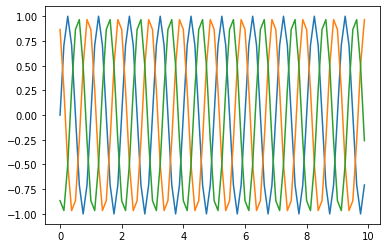

In [57]:
x = np.sin(2*pi*t)
y = np.sin(2*pi*t+ 2*pi/3)
z  = np.sin(2*pi*t + 4*pi/3)
m = np.array([x,y,z]).T
plt.plot(t,m)

In [58]:
b = la.null_space(m)
print(b)

[[-0.57735027]
 [-0.57735027]
 [-0.57735027]]


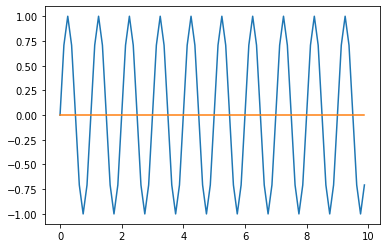

In [59]:
plt.plot(t,x)
plt.plot(t,m@b)

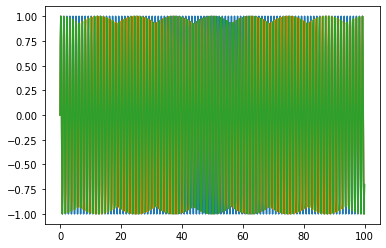

In [63]:
a = np.sin(1*2*pi*t)
b = np.sin(1.01*2*pi*t)
c = np.sin(0.99*2*pi*t)
m0 = np.array([a,b,c]).T

x = a
y = b
z  = c
m = np.array([x,y,z]).T
plt.plot(t,m)


In [64]:
m0.T@m/(len(a))

array([[ 5.00000000e-01, -2.73558953e-15, -2.57571742e-15],
       [-2.73558953e-15,  5.00000000e-01, -2.83328916e-15],
       [-2.57571742e-15, -2.83328916e-15,  5.00000000e-01]])

<IPython.core.display.Javascript object>


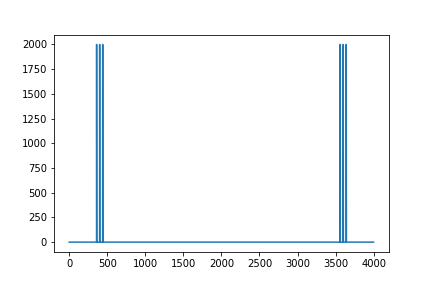

In [126]:
plt.figure()
# plt.plot(np.abs(np.fft.fft(a)))

plt.plot(np.abs(np.fft.fft(x+y+z)))

<IPython.core.display.Javascript object>


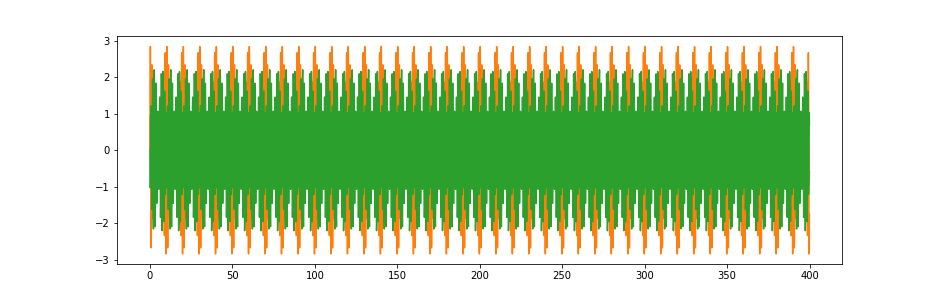

In [127]:
plt.figure()
plt.plot(t,x)
plt.plot(t,x+y+z)
plt.plot(t,-x+z-y)

In [128]:
2.5/0.03


83.33333333333334

<IPython.core.display.Javascript object>


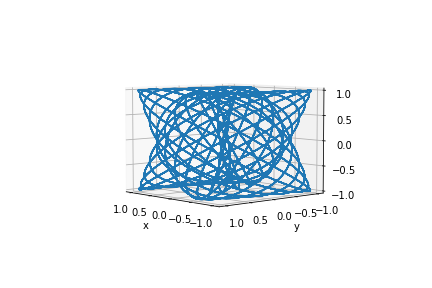

Text(0.5, 0, 'y')

In [141]:
dt = .01
t = np.arange(0,100,dt)
pi = np.pi

a = np.sin(1*2*pi*t)
b = np.sin(1.1*2*pi*t)
c = np.sin(.95*2*pi*t)
m0 = np.array([a,b,c]).T

x = a
y = b
z  = c

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='parametric curve')
plt.xlabel('x')
plt.ylabel('y')
# plt.zlabel('z')

<IPython.core.display.Javascript object>


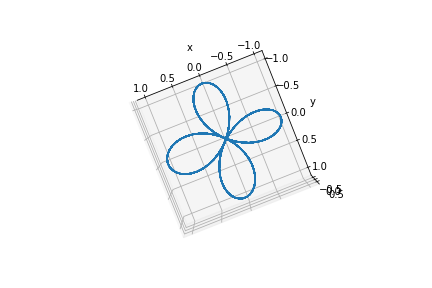

Text(0.5, 0, 'y')

In [205]:
dt = .01
t = np.arange(0,10,dt)
pi = np.pi
r = 1
ft = 1
ff = 2
x = np.sin(ft*2*pi*t)*np.cos(ff*2*pi*t)
y = np.cos(ft*2*pi*t)*np.cos(ff*2*pi*t)
z = np.sin(ff*2*pi*t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, label='parametric curve')
plt.xlabel('x')
plt.ylabel('y')
# plt.zlabel('z')

<IPython.core.display.Javascript object>


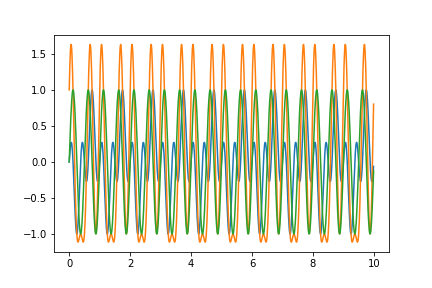

In [206]:
plt.figure()
plt.plot(t,x)
plt.plot(t,x+z+y)
plt.plot(t,z)

<IPython.core.display.Javascript object>


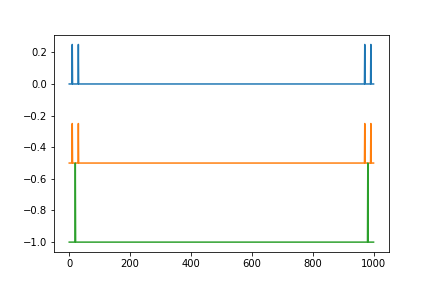

In [207]:
plt.figure()
# plt.plot(np.abs(np.fft.fft(a)))
plt.plot(np.abs(np.fft.fft(x))/len(x))
plt.plot(np.abs(np.fft.fft(y))/len(y)-.5)
plt.plot(np.abs(np.fft.fft(z))/len(z)-1)